# Student_exam_oriented_ex_7_1

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/jdariasl/OTBD/main/content/init.py
import init; init.init(force_download=False)

In [ ]:
#!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended

In [1]:
import numpy as np
from local.lib.data import load_data
import scipy as sc
import matplotlib.pyplot as plt

In [ ]:
#!pip install cvxpy

In [2]:
import cvxpy as cp

## Exercise


- Algorithm: ADMM
- Problem: LASSO

$\underset{{\bf{w}}}{\min}f({\bf{w}})=\underset{{\bf{w}}}{\min}\left(\frac{1}{n}\left\Vert {\bf{X}}{\bf{w}}-{\bf{y}}\right\Vert _{2}^{2}+\lambda\left\Vert {\bf{w}}\right\Vert _{1}\right)$

- Data: Boston housing dataset
    - 13 features: crime rate, proportion of non-retail business, $\textrm{N}\textrm{O}_{2}$ concentration, number of rooms per house...
        - We use only 12 features: $\bf{X}$ is a $400\times12$ matrix containing 400 dataset entries.
    - Target: to predict the price of the houses (in thousands of \$).
        -  Thus, ${\bf{y}}$ is a $400\times1$ vector containing the regression target (i.e., the price)

In [3]:
#load data
X,y = load_data("regression", 1)
n,d = X.shape
#data normalisation
X = sc.stats.zscore(X)
y = sc.stats.zscore(y)

In [4]:
# Constant parameters
lamb = 0.1   #regularisation parameter
Niter= 500   # Number of iterations for each algorithm

In [5]:
#cvx_solver
def solver_cvx(n,X,Y,lamb,objective_fn):
    n_columns = X.shape[1]
    w = cp.Variable(n_columns)
    lambd = cp.Parameter(nonneg=True)
    lambd.value = lamb
    problem = cp.Problem(
        cp.Minimize(objective_fn(n, X, Y, w, lambd))
    )
    problem.solve()
    return w.value

In [6]:
# Get the optimum value for comparison purposes 
#===================================
loss_fn = lambda n, X, Y, w: (1/n)*cp.pnorm(X @ w - Y, p=2)**2
reg_L1 = lambda w: cp.pnorm(w, p=1)
loss_lasso = lambda n, X, Y, w, lambd: loss_fn(n, X, Y, w) + lambd * reg_L1(w)


# Solution of the empirical risk using CVX
#=========================================
w_lasso_cvx=solver_cvx(n,X,y,lamb,loss_lasso)

w = cp.Variable(w_lasso_cvx.shape[0])
w.value = w_lasso_cvx
f_cvx=loss_lasso(n,X,y,w_lasso_cvx,lamb).value

print(f'The loss function f at the optimum takes the value {f_cvx}')

The loss function f at the optimum takes the value 0.4322238949006313


In [7]:
#Function that estimates the loss for several w at once.
f = lambda n, X, Y, w, lambd: (1/n)*np.sum((X@w - np.kron(Y.reshape(-1,1),np.ones((1,Niter+1))))**2, axis=0) + lambd*np.sum(np.abs(w),axis=0)

In [9]:
# ADMM centralized

#Constants
ro=0.1  # Quadratic term
w_admm_c = np.zeros((d,Niter+1))
z_admm_c = np.zeros((d,Niter+1))
u_admm_c = np.zeros((d,Niter+1))


for k in range(Niter):
    #Complete the code including the updating formulas for centrilized ADMM. 
    # Keep the weigths values for all the iterations
    w_admm_c[:,k+1]=...

f_admm_c=f(n,X,y,w_admm_c,lamb)

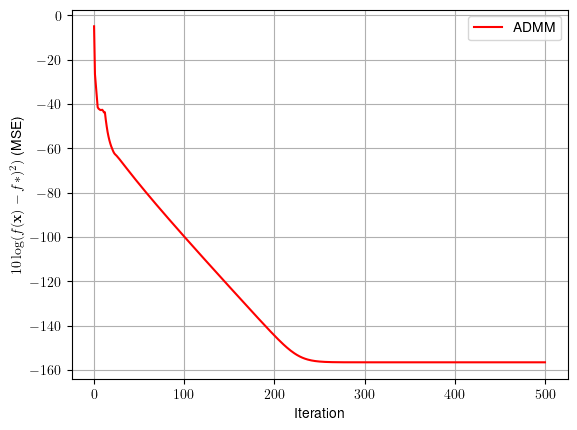

In [10]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})
t = range(Niter+1)
plt.plot(t, 10*np.log10((f_admm_c-f_cvx)**2+np.finfo(float).eps), color = 'r',label = 'ADMM')
plt.grid()
plt.legend()
plt.xlabel('Iteration')
plt.ylabel(r'$10\log(f({\bf{x}})-f*)^2)$ (MSE)')
plt.show()